# Similarity - Bag of words - count

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

F:\ProgramData\Anaconda3\envs\NLP\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


### ENG

In [2]:
df = pd.read_csv('songs_bow_count_en.csv', header=0)
print(df.shape)
df.head()

(185, 1327)


,abandoned,abba,abides,able,abraham,abrahams,absorb,abundant,abyss,accelerate,...,wrong,years,you,youll,your,yours,yourself,youth,zion,zither
0,0,12,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df2 = pd.read_csv('gospel_bow_count_en.csv', header=0)
print(df2.shape)
df2.head()

(128, 1327)


,abandoned,abba,abides,able,abraham,abrahams,absorb,abundant,abyss,accelerate,...,wrong,years,you,youll,your,yours,yourself,youth,zion,zither
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Cosine similarity

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
sim = cosine_similarity(df, df2)

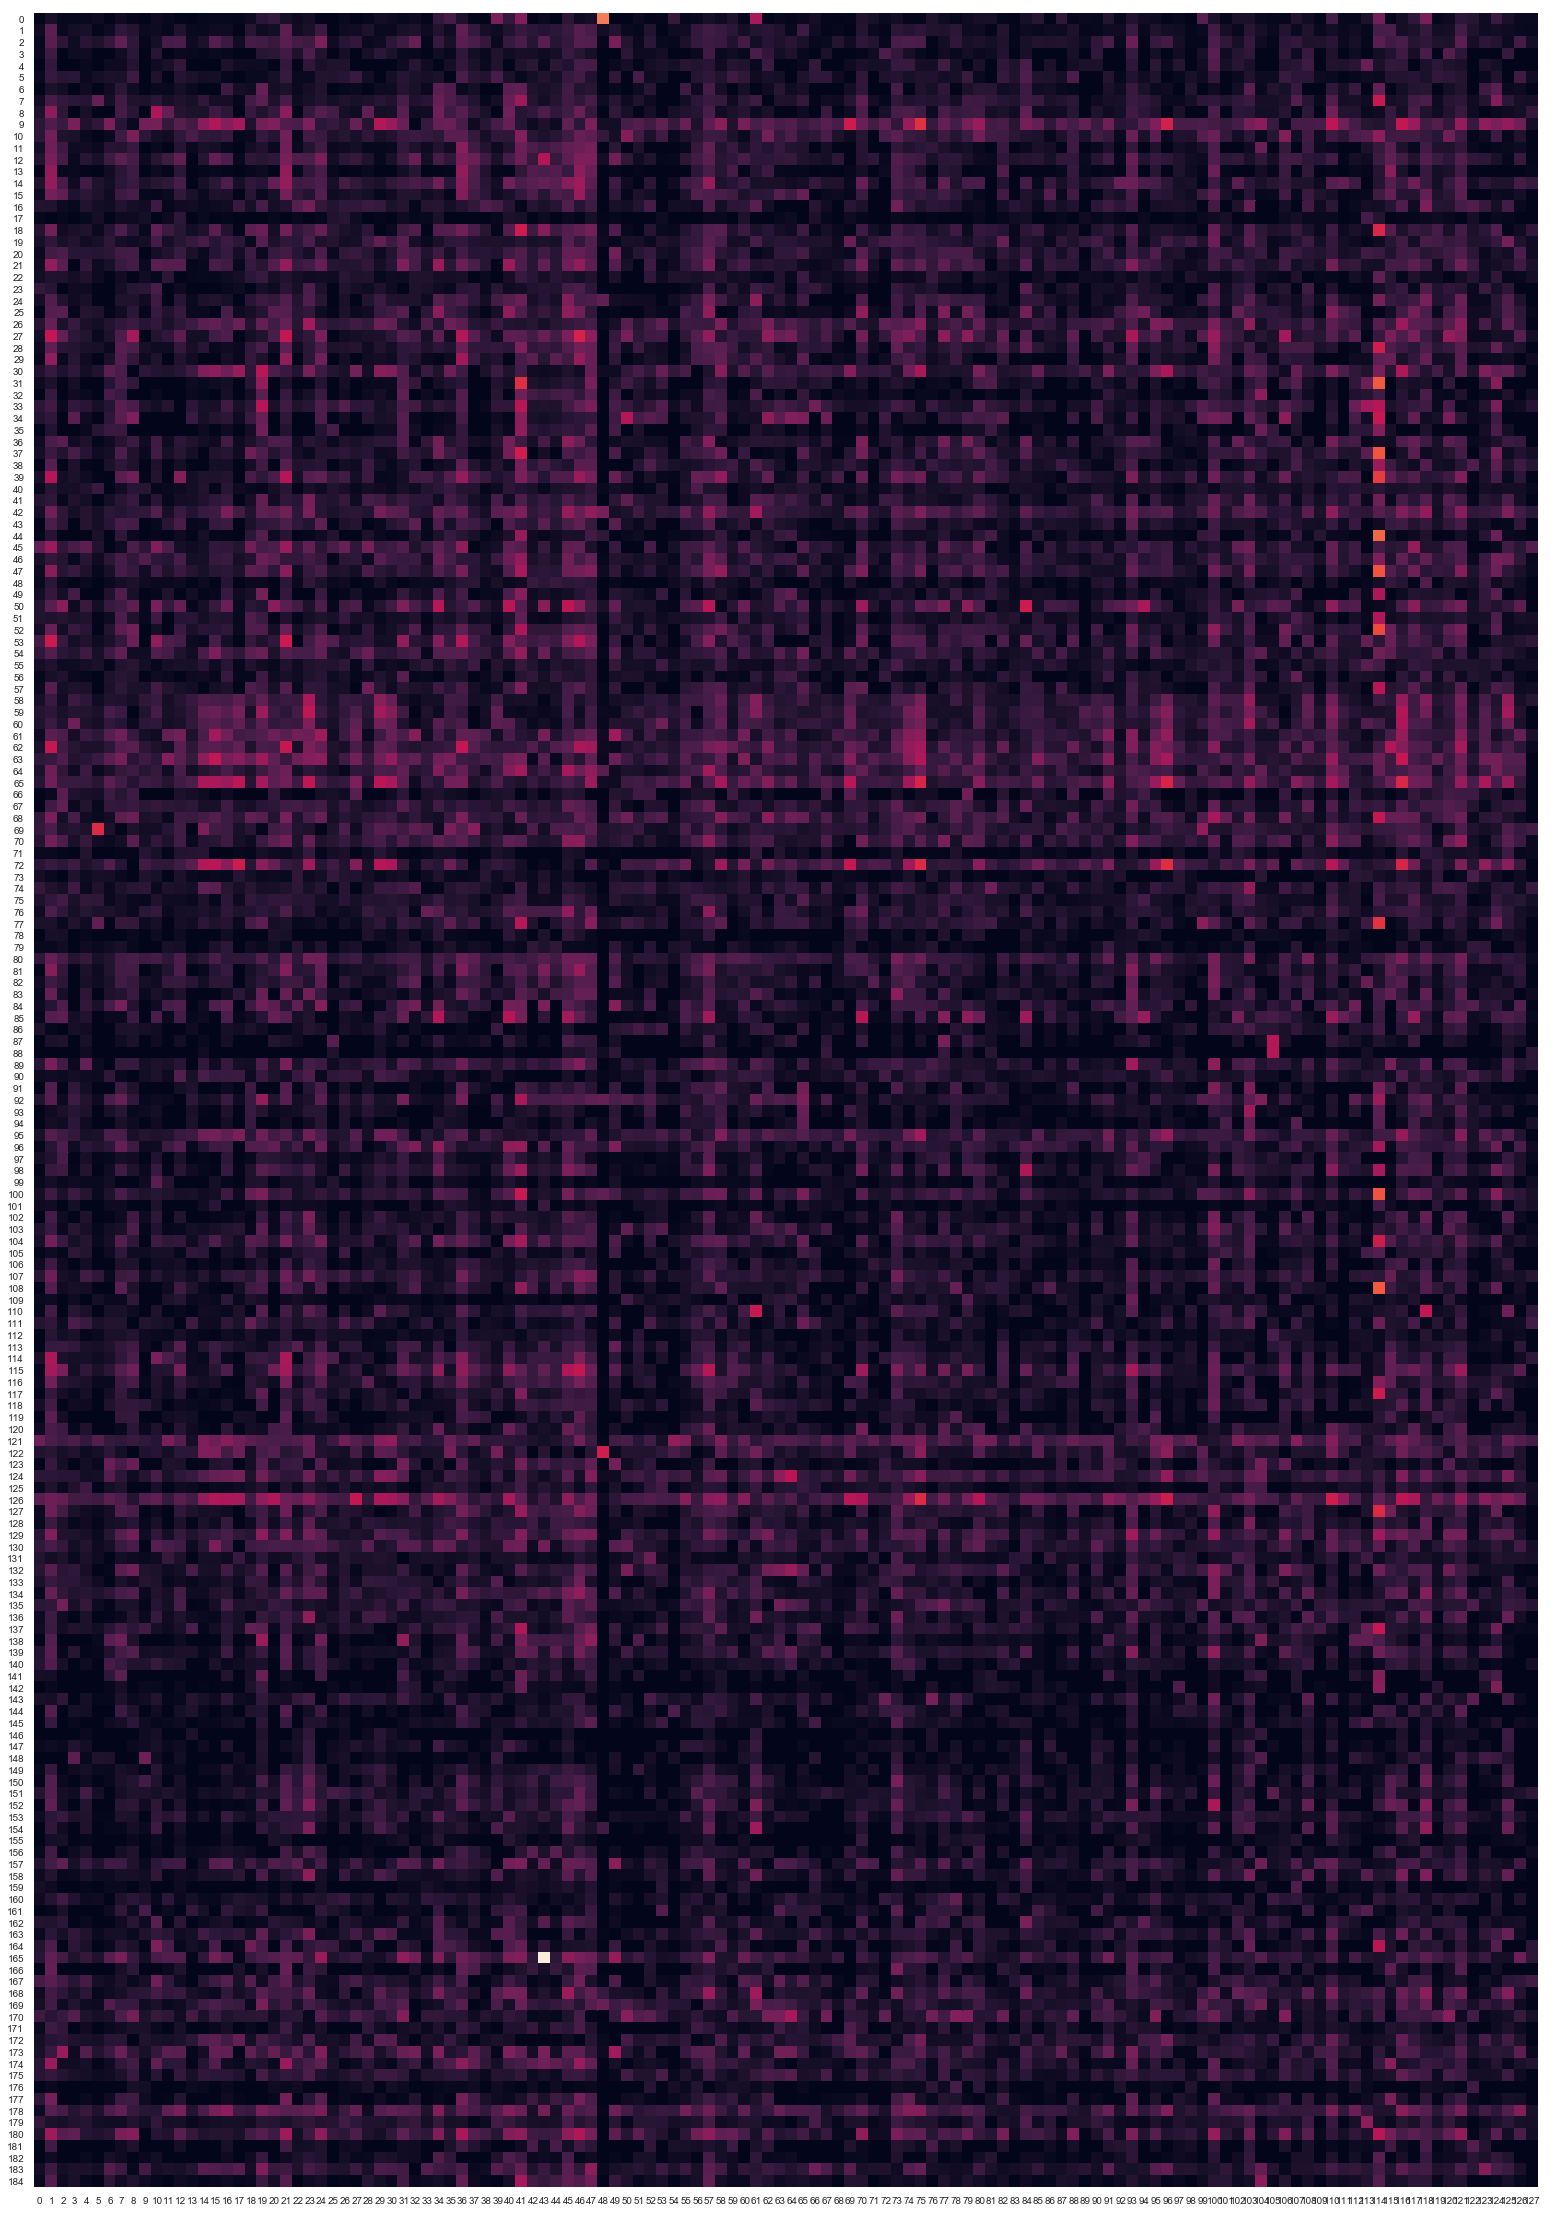

In [11]:
plt.figure(figsize=(60,40))
sns.set(font_scale=0.9)
sns.heatmap(sim, cbar=False, annot=False, #xticklabels= titles, 
            #yticklabels = titles, 
            square=True,
          # linewidths=.01
           )
plt.xticks(rotation=0) 
plt.show()

#### Check

In [8]:
df_s = pd.read_csv('piosenki_pl_en.csv', header=0)
df_r = pd.read_csv('df_eng_gospel.csv', header=0)

In [14]:
print(df_s.iloc[108]['en'])
print()
print(df_r.iloc[114]['Ewangelia'])

This is the day the Lord gave us, let us joy and rejoice in him.

Jesus, being in a place, prayed, and when he finished, one of the disciples said to him, "Lord, teach us how to pray, just as John taught his disciples." And he said to them, "When you pray, say, Father, let your name be holy, let your kingdom come, give us our daily bread for each day and forgive us our sins, for we also forgive everyone who against us and let us not succumb to temptation. "


In [15]:
df_sim = pd.DataFrame(sim)

In [16]:
df_sim.max().max()

0.8488746876271657

### Jaccard similarity

In [17]:
from scipy.spatial import distance

In [18]:
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    print(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection / union)

In [10]:
from sklearn.metrics.pairwise import pairwise_distances
jac_sim = 1 - pairwise_distances(df, df2, metric = "jaccard")
# optionally convert it to a DataFrame
#jac_sim = pd.DataFrame(jac_sim, index=df.columns, columns=df.columns)

F:\ProgramData\Anaconda3\envs\NLP\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)
F:\ProgramData\Anaconda3\envs\NLP\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


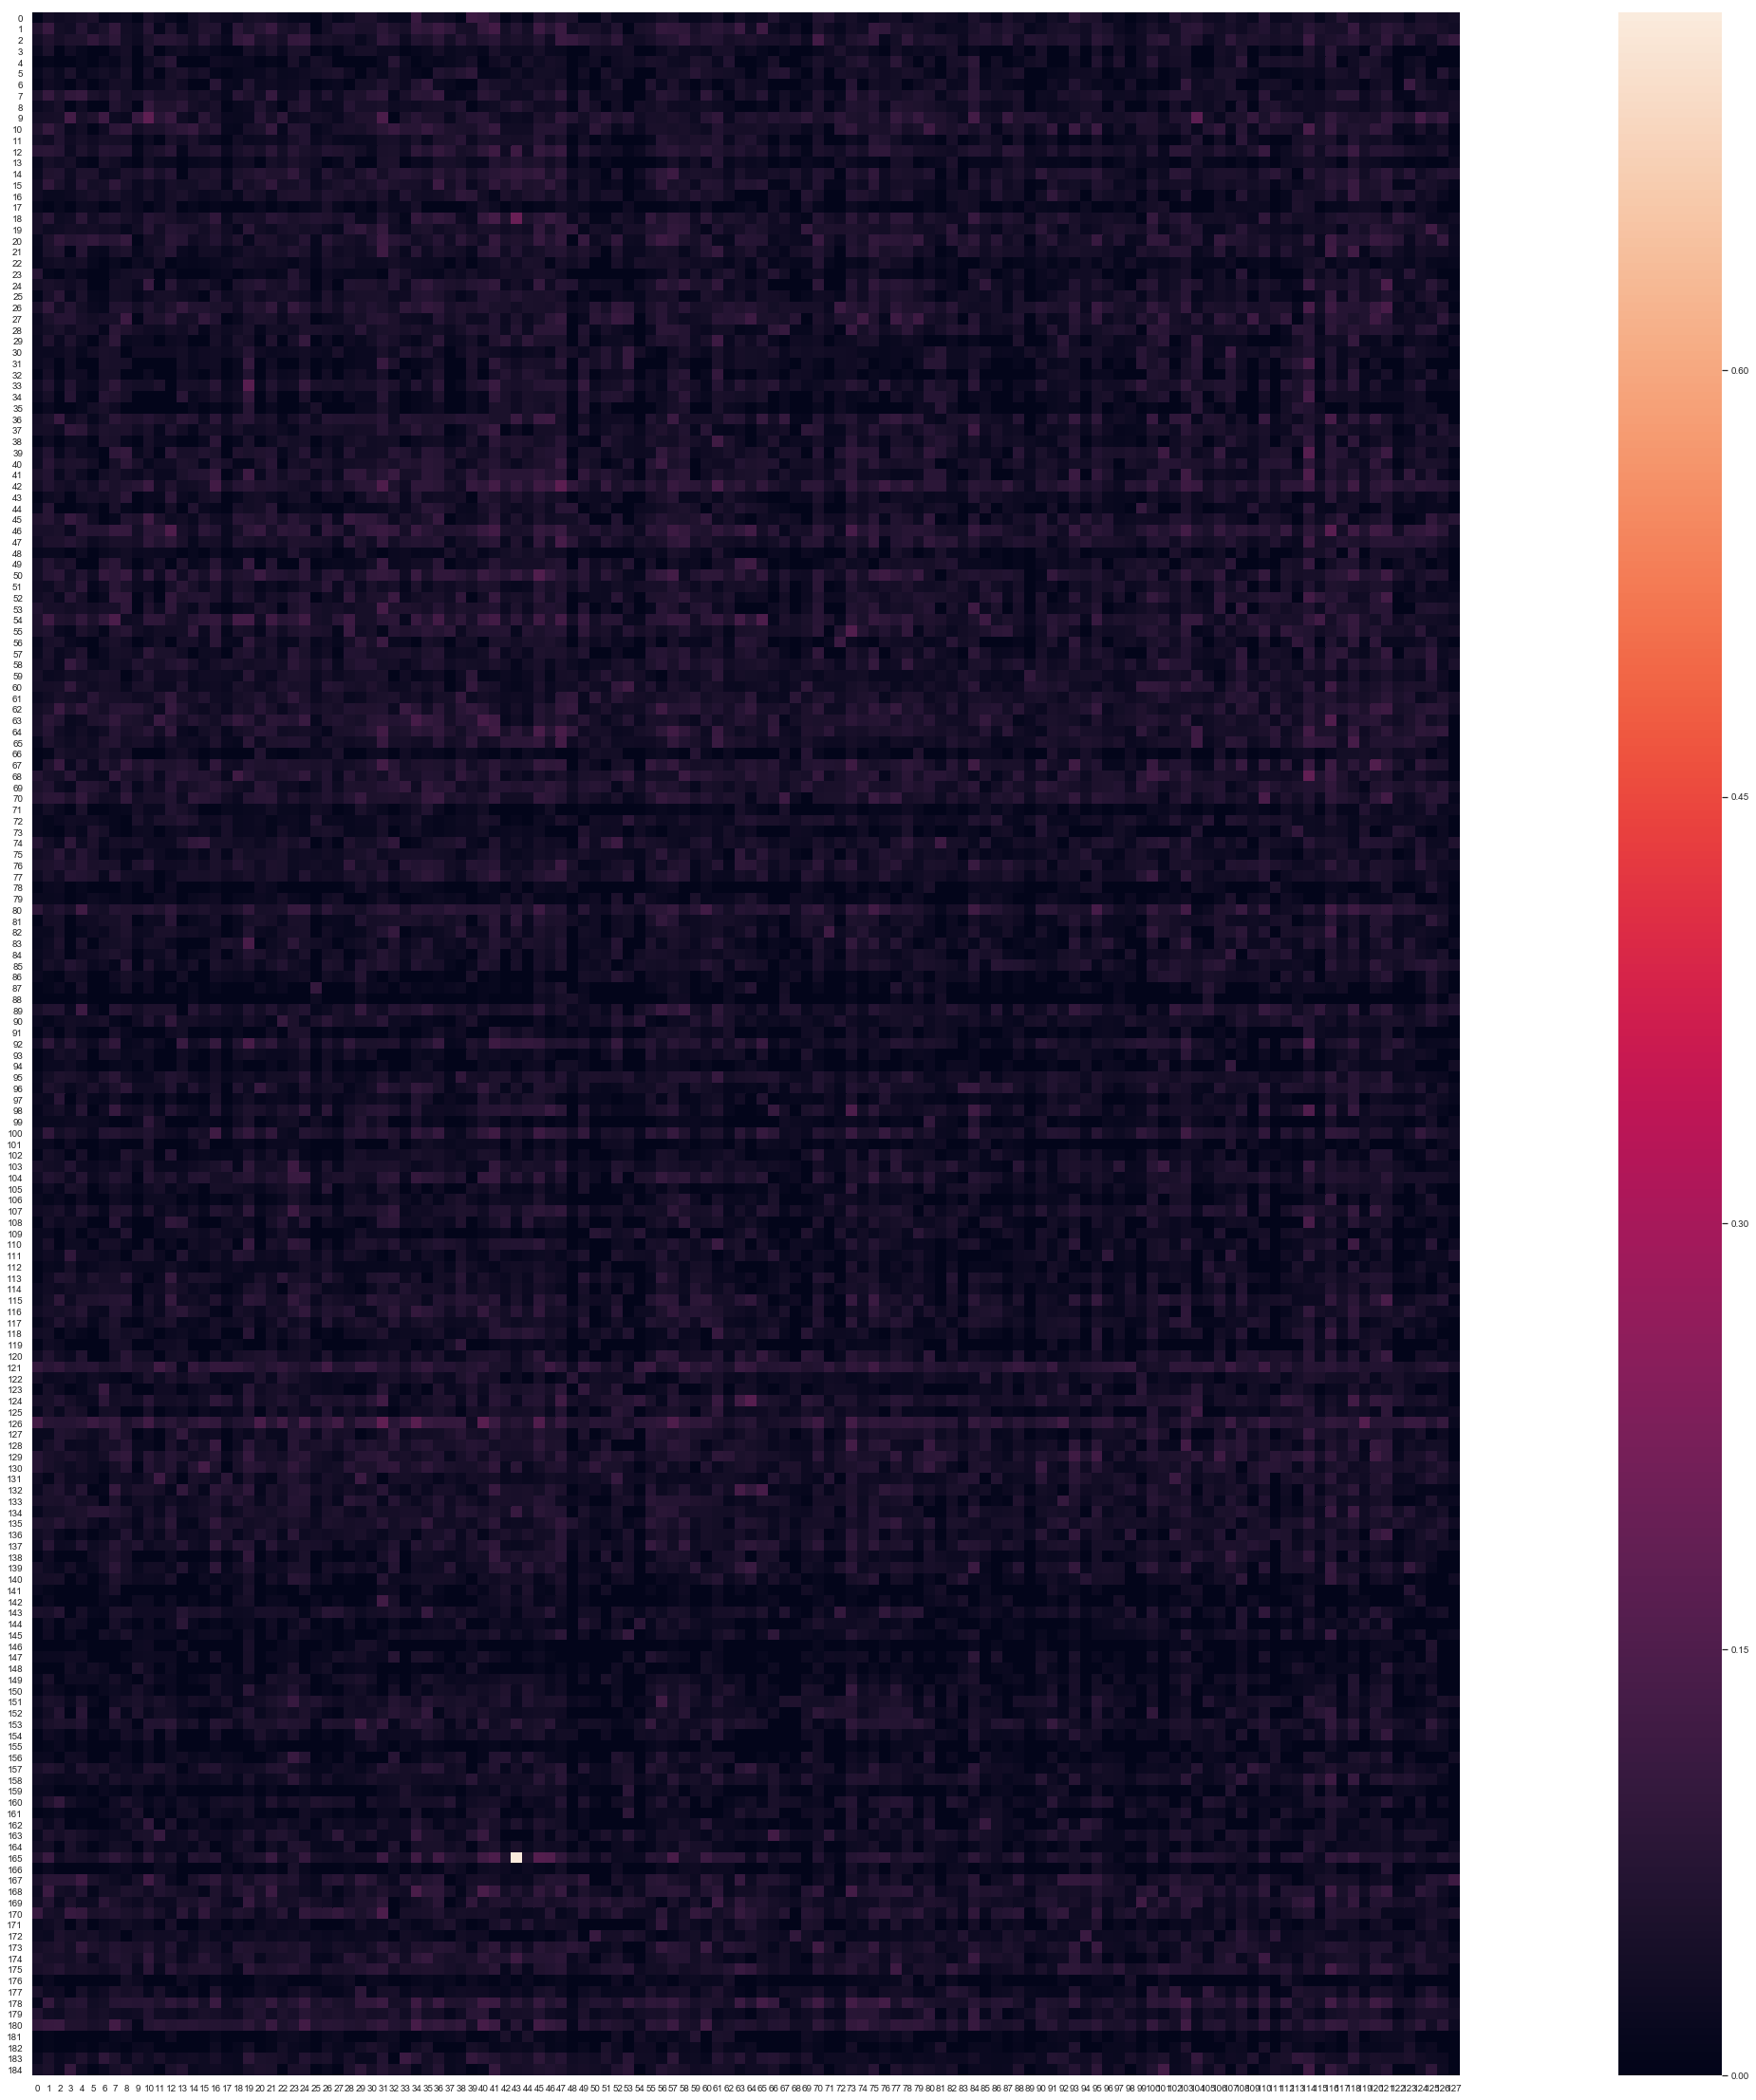

In [21]:
plt.figure(figsize=(60,40))
sns.set(font_scale=0.9)
sns.heatmap(jac_sim, cbar=True, annot=False, #xticklabels= titles, 
            #yticklabels = titles, 
            square=True,
          # linewidths=.01
           )
plt.xticks(rotation=0) 
plt.show()

#### Check

In [24]:
print(df_s.iloc[18]['en'])
print()
print(df_r.iloc[43]['Ewangelia'])

Christ the Lord nourishes us with His Holy Body, let us praise Him for all time, I glorify the Lord wholeheartedly, God, the only Savior, because in Him I find all the joy of my life. Christ the Lord nourishes us with His holy body, let us praise him for ever, I adore him because he wanted to look down from heaven to his servant humbled, that from now on all men would be able to call the Blessed. Christ the Lord nourishes us with His Holy Body, let us praise him forever. He has done great works in me in his kindness inconceivable, he, the Almighty, he, the greatest, he alone is always holy. Christ the Lord nourishes us with His Holy Body, let us praise Him forever, who for generations remains merciful, who serves Him and wants to be faithful to Him. Christ the Lord nourishes us with His Holy Body, let us praise Him forever, He who reveals His power, when the haughtiness of hearts humbles, every intention can destroy, who pride Him with offenses. Christ the Lord nourishes us with His ho

### PL

In [2]:
df = pd.read_csv('songs_bow_count_pl_lem.csv', header=0)
print(df.shape)
df.head()

(186, 1310)


,abba,abraham,adonai,alleluja,amen,amor,anioł,archanioł,ave,ażebym,...,żeś,żeśmy,życie,życiodajny,żywioła,żywić,żywot,żywy,żyć,żyła
0,12,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
1,0,0,0,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df2 = pd.read_csv('czytania_bow_count_pl.csv', header=0)
print(df2.shape)
df2.head()

(87, 1310)


,abba,abraham,adonai,alleluja,amen,amor,anioł,archanioł,ave,ażebym,...,żeś,żeśmy,życie,życiodajny,żywioła,żywić,żywot,żywy,żyć,żyła
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Cosinus similarity

In [7]:
sim_pl = cosine_similarity(df, df2)

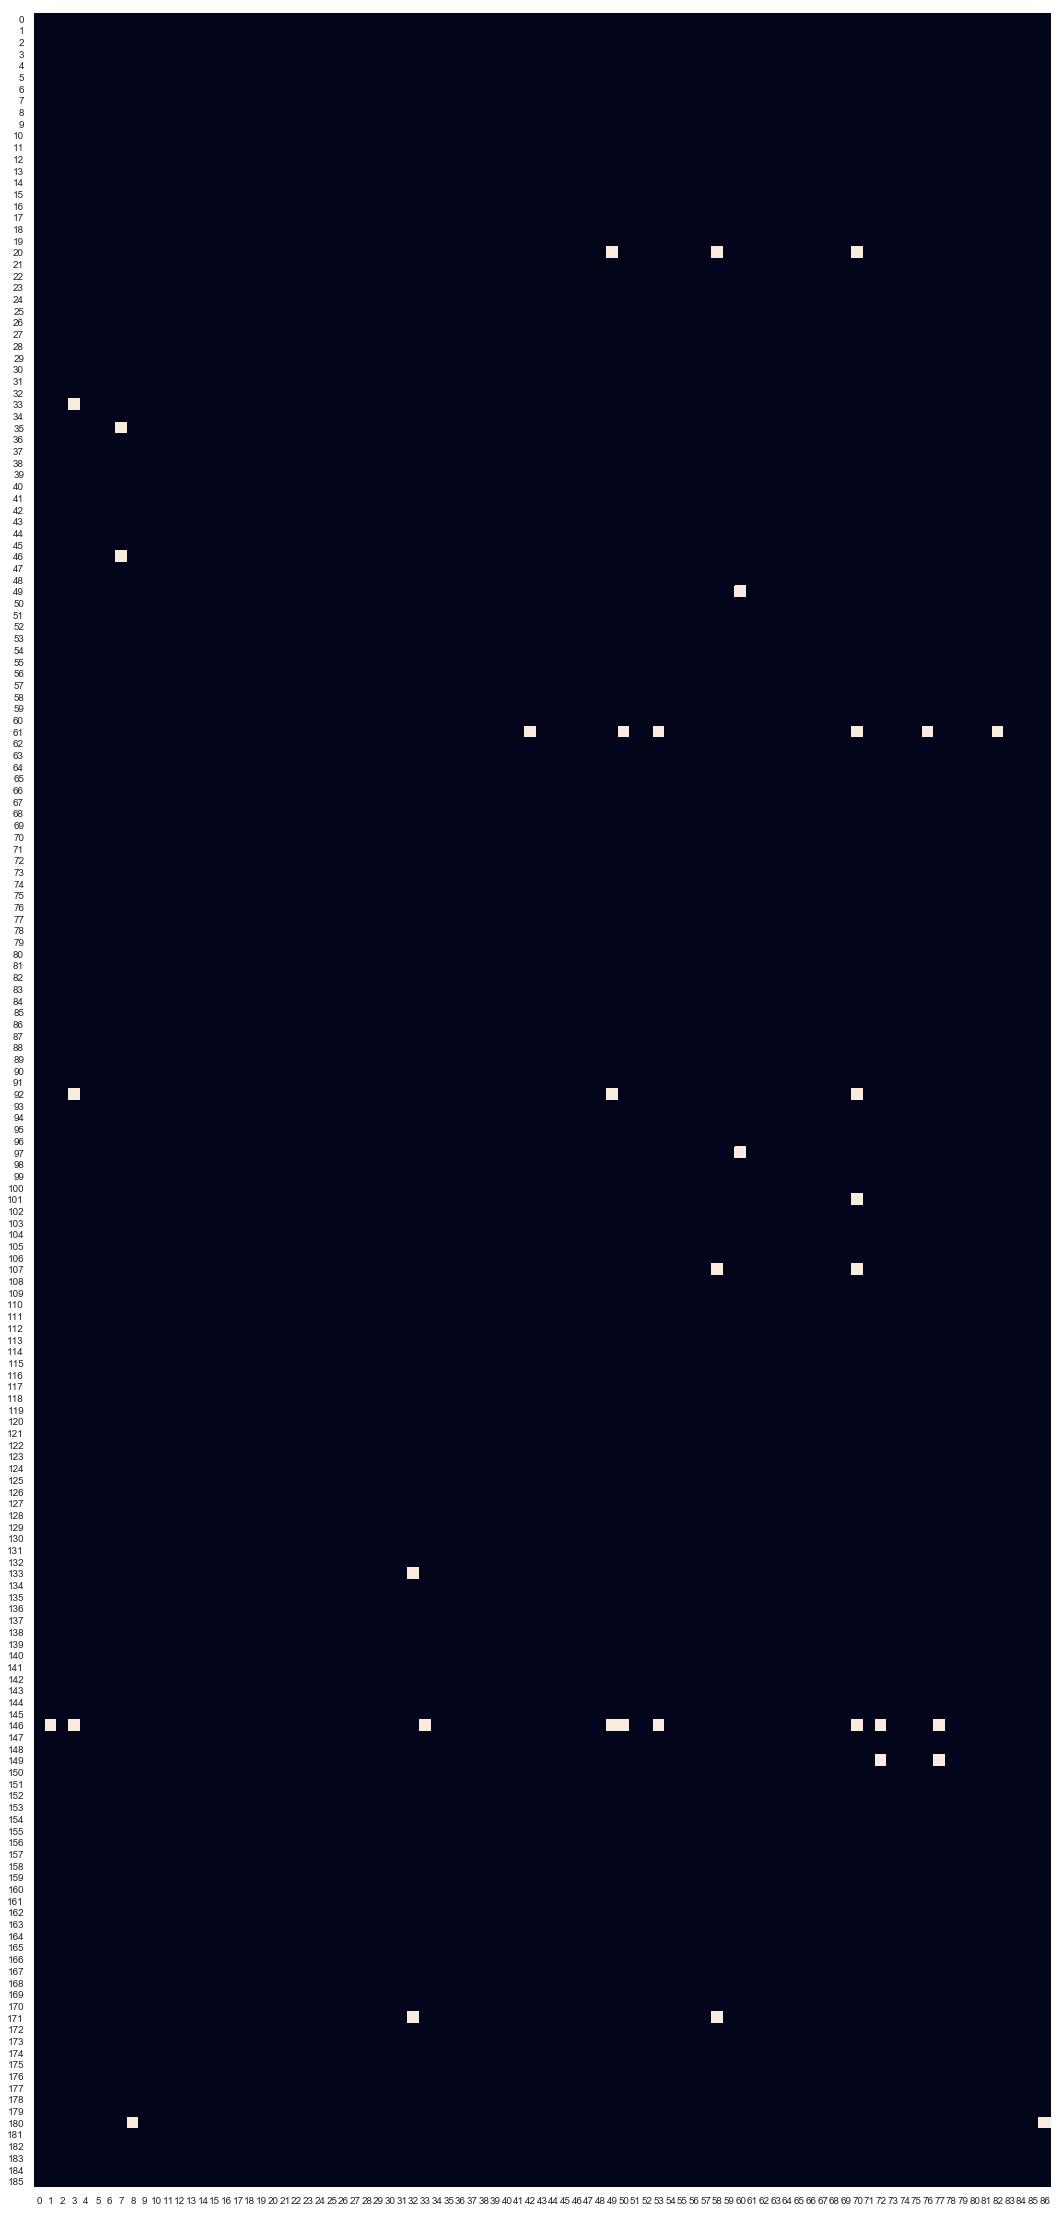

In [13]:
plt.figure(figsize=(60,40))
sns.set(font_scale=0.9)
sns.heatmap(sim_pl >= 0.5, cbar=False, annot=False, #xticklabels= titles, 
            #yticklabels = titles, 
            square=True,
          # linewidths=.01
           )
plt.xticks(rotation=0) 
plt.show()

### Jaccard index

In [11]:
jac_sim = 1 - pairwise_distances(df, df2, metric = "jaccard")

F:\ProgramData\Anaconda3\envs\NLP\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)
F:\ProgramData\Anaconda3\envs\NLP\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to bool by check_pairwise_arrays.
  warnings.warn(msg, DataConversionWarning)


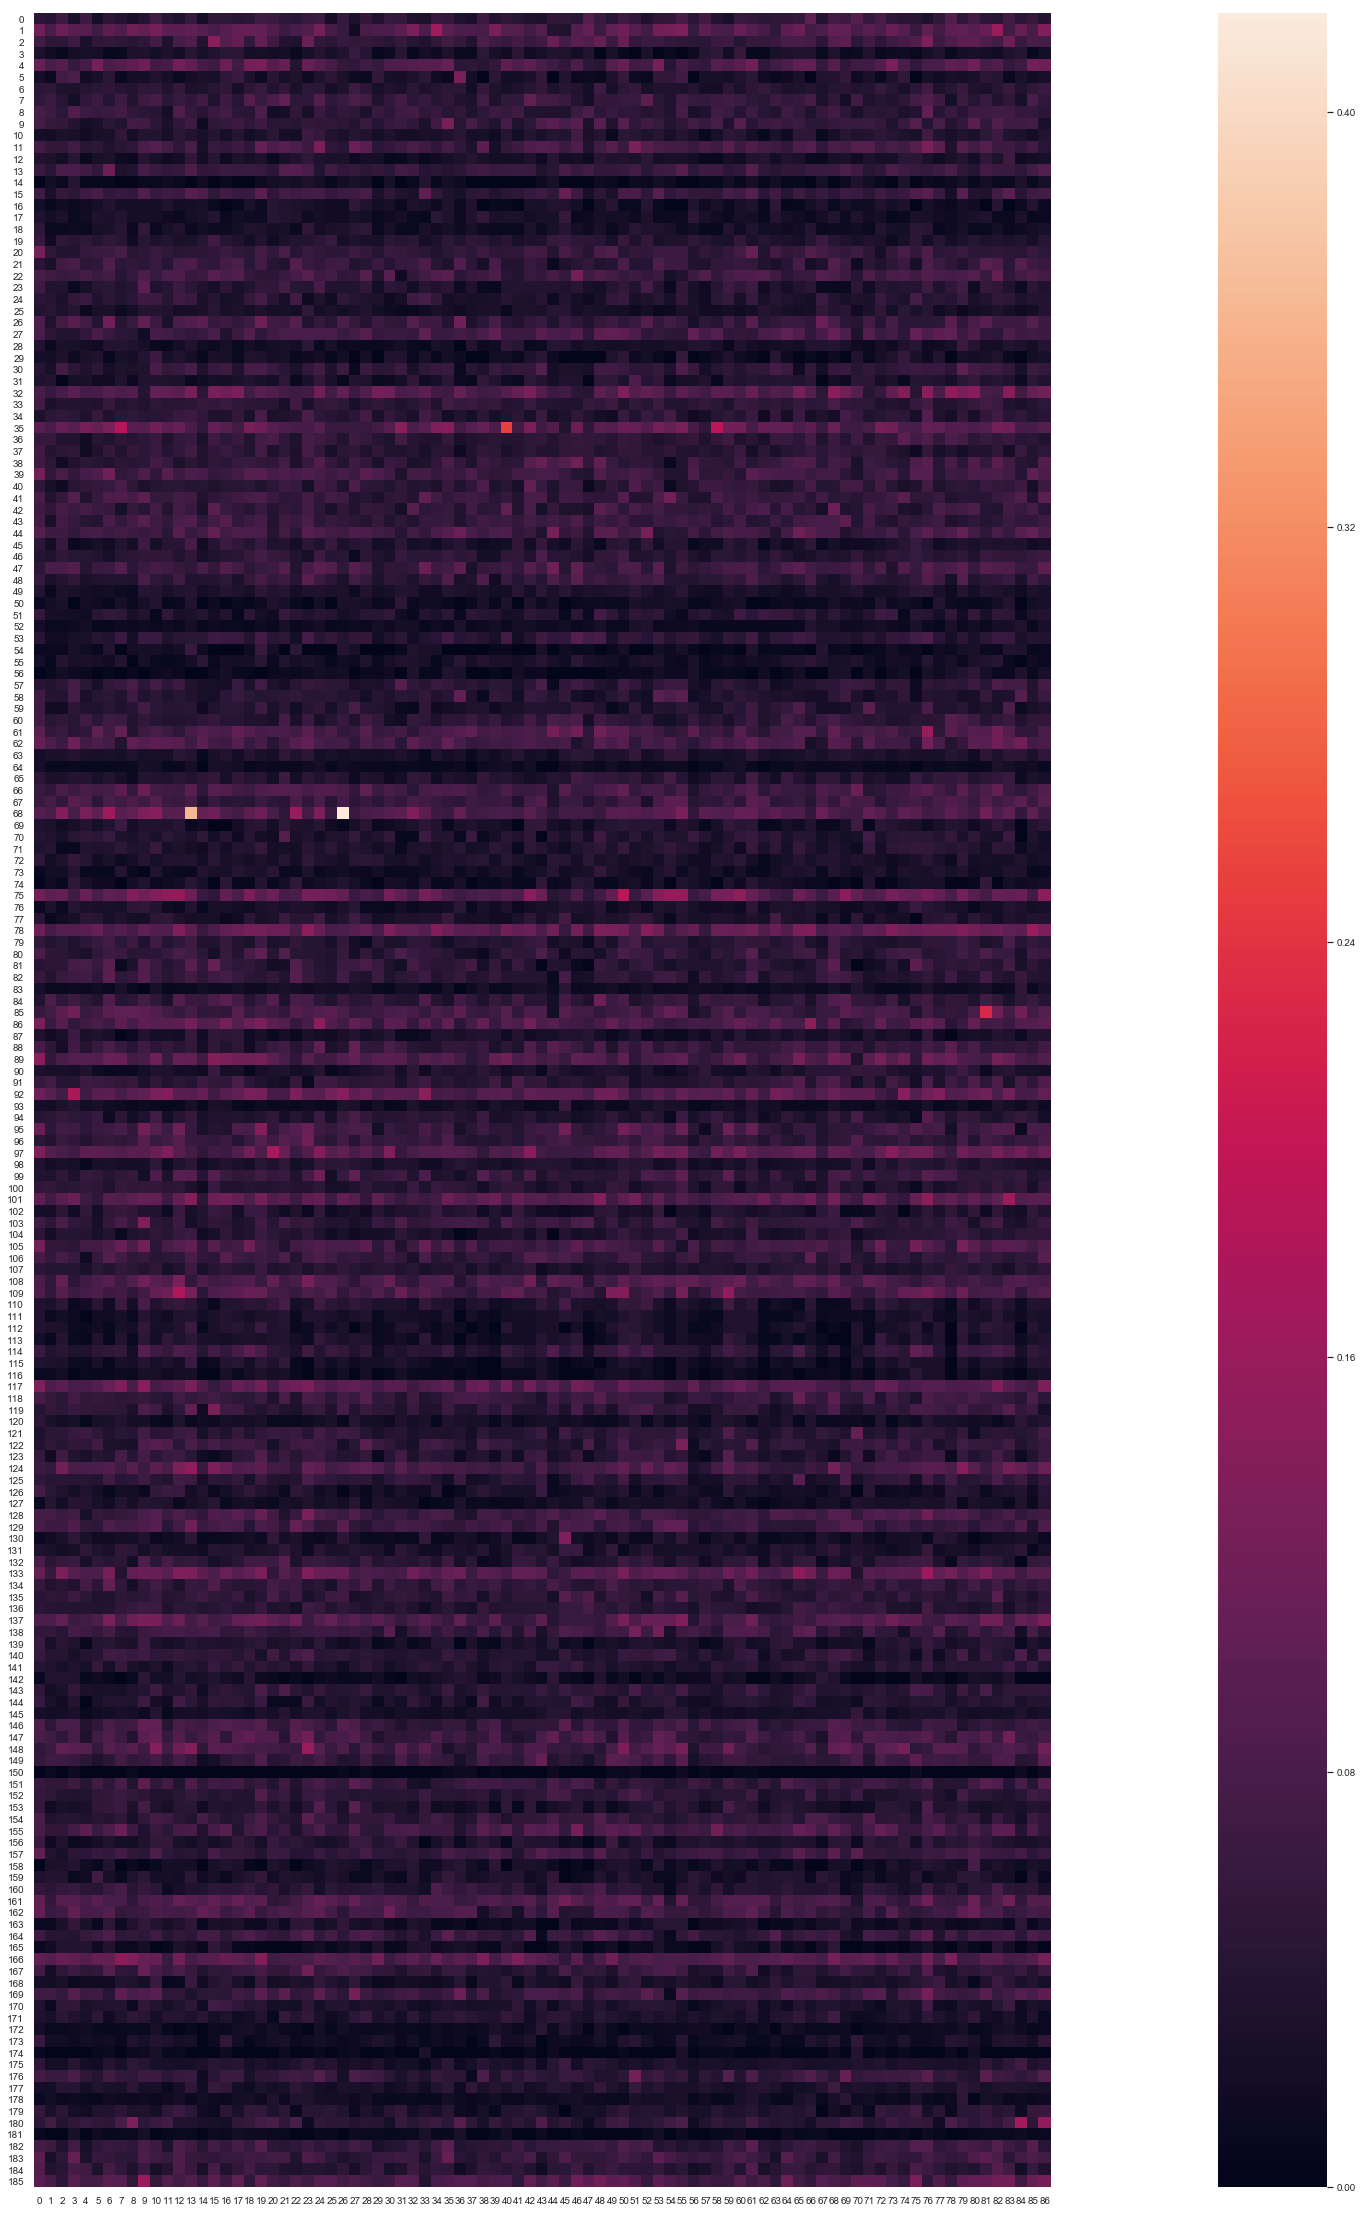

In [12]:
plt.figure(figsize=(60,40))
sns.set(font_scale=0.9)
sns.heatmap(jac_sim, cbar=True, annot=False, #xticklabels= titles, 
            #yticklabels = titles, 
            square=True,
          # linewidths=.01
           )
plt.xticks(rotation=0) 
plt.show()